<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/notebooks/Practica-1-MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Conectar la notebook en modo GPU

Entorno de ejecución → Cambiar tipo de entorno de ejecución

Algunas consideraciones:

* No dejar la notebook conectada sin actividad ya que Colab penaliza esto al asignar un entorno con GPU.
* No pedir el entorno con GPU si no se va a usar.

---

# ⭕ Parte I

Usando el mismo dataset MNIST de Keras, implementa las siguientes redes neuronales de tipo MLP:

* 1 capa oculta de 200 neuronas sin activación. Entrena durante 30 épocas.
* 1 capa oculta de 200 neuronas con activación $tanh$. Entrena durante 30 épocas.
* 3 capas ocultas de 100, 200 y 100 neuronas respectivamente, todas con activación ReLU. Entrena durante 50 épocas.

En cada uno de los experimentos determina las especificaciones de las capas de entrada y salida. Además, en cada caso, reporta el accuracy y recall en el conjunto de prueba, así como las curvas de entrenamiento (perdida y accuracy).

* Con el objetivo de subir la métrica de accuracy en el conjunto de prueba, entrena un nuevo módelo de red neuronal MLP cambiando los siguientes hiperparámetros:

 * Número de capas ocultas.
 * Número de neuronas en cada capa oculta.
 * Función de activación de cada capa oculta.
 * Optimizador ([opciones](https://keras.io/api/optimizers/)).


---


Como referencia, el mejor resultado hasta ahora, sin usar redes convolucionales, es un accuracy de 99.65% (https://arxiv.org/abs/1003.0358)

Lista de resultados: http://yann.lecun.com/exdb/mnist/, https://paperswithcode.com/sota/image-classification-on-mnist

## El conjunto de datos

In [ ]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

y_test_original = y_test.copy()  # Esta copia la usarás para hacer las evaluaciones de las métricas de rendimiento

y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

11490434/11490434 [==============================] - 1s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


## Tu trabajo

In [ ]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(history.epoch, history.history['mae'],
            label='Train Error')
    plt.plot(history.epoch, history.history['val_mae'],
            label = 'Val Error')
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(history.epoch, history.history['mse'],
            label='Train Error')
    plt.plot(history.epoch, history.history['val_mse'],
            label = 'Val Error')
    plt.legend()
    plt.show()

In [ ]:
# Función para graficar train and valitation loss
def train_and_val_loss():
    loss_train = history.history['loss']
    loss_val = history.history['val_loss']

    epochs = range(1,n_epocas+1)

    plt.figure(figsize=(7,5))
    plt.plot(epochs, loss_train, 'g', label='Training loss')
    plt.plot(epochs, loss_val, 'b', label='validation loss')
    plt.title('Training and Validation loss',fontsize=15)
    plt.xlabel('Epochs',fontsize=14)
    plt.ylabel('Loss',fontsize=14)
    plt.legend()
    plt.show()

In [ ]:
# Función para graficar el train and validation accuracy
def train_and_val_acc():
    loss_train = history.history['acc']
    loss_val = history.history['val_acc']

    epochs = range(1,n_epocas+1)

    plt.figure(figsize=(7,5))
    plt.plot(epochs, loss_train, 'g', label='Training Accuracy')
    plt.plot(epochs, loss_val, 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy',fontsize=15)
    plt.xlabel('Epochs',fontsize=14)
    plt.ylabel('Accuracy',fontsize=14)
    plt.xticks(epochs)
    plt.legend()
    plt.show()

In [ ]:
# 1 capa oculta de 200 neuronas sin activación. Entrena durante 15 épocas.
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28,28))) # Tenemos que aplanar las matrices representando a cada imagen, las capas densas sólo funcionan con vectores de entrada
model.add(Dense(200, activation=None))
model.add(Dense(10, activation='softmax'))  # Cuando se trata de tareas de clasificación multiclase, ponemos una activación softmax en la capa de salida

In [ ]:
model.compile(loss='categorical_crossentropy',
	      optimizer='adam',
	      metrics=['acc']
		  )

In [ ]:
n_epocas = 30
history = model.fit(X_train, y_train, epochs=n_epocas, validation_data=(X_test,y_test))

Epoch 1/30
1875/1875 [==============================] - 8s 3ms/step - loss: 16.8770 - acc: 0.8544 - val_loss: 6.0571 - val_acc: 0.8825
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 3.3714 - acc: 0.8696 - val_loss: 1.9994 - val_acc: 0.8617
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7805 - acc: 0.8531 - val_loss: 1.8966 - val_acc: 0.8303
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7976 - acc: 0.8482 - val_loss: 1.5736 - val_acc: 0.8586
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7475 - acc: 0.8534 - val_loss: 2.0445 - val_acc: 0.8293
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7495 - acc: 0.8600 - val_loss: 2.3363 - val_acc: 0.8223
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 1.8171 - acc: 0.8640 - val_loss: 1.9337 - val_acc: 0.8683
Epoch 8/30
1875/1875 [==============================] - 6s 3m

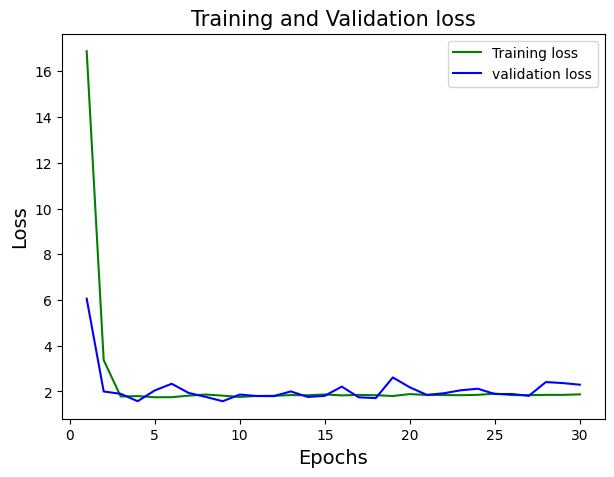

In [ ]:
train_and_val_loss()

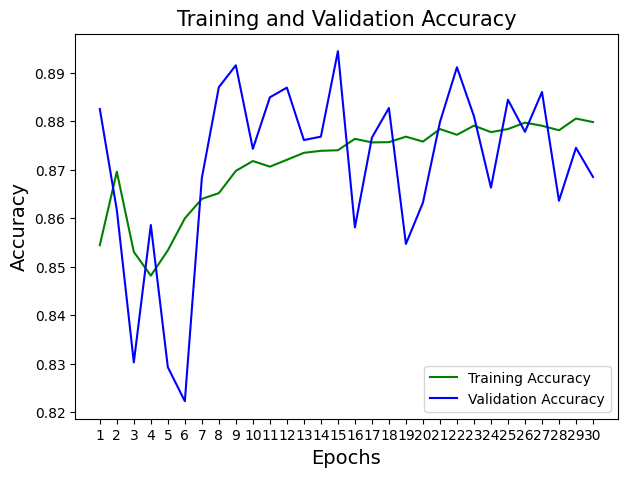

In [ ]:
train_and_val_acc()

In [ ]:
predictions_matrix = model.predict(X_test)
predictions = np.argmax(predictions_matrix, axis=1)  # Prueba a comentar esta línea y discutamos qué pasa
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Test Accuracy: {accuracy_score(y_pred=predictions,y_true=y_test_original)}")
print(f"Test Recall: {recall_score(y_pred=predictions,y_true=y_test_original,average='macro')}")
print(f"Test Precision: {precision_score(y_pred=predictions,y_true=y_test_original,average='macro')}")

313/313 [==============================] - 1s 2ms/step
Test Accuracy: 0.8685
Test Recall: 0.8673439784571306
Test Precision: 0.8778336960277043


#### Respuesta 2

In [ ]:
# 1 capa oculta de 200 neuronas con activación  tanh . Entrena durante 15 épocas.

model = Sequential()
model.add(Flatten(input_shape=(28,28))) # Tenemos que aplanar las matrices representando a cada imagen, las capas densas sólo funcionan con vectores de entrada
model.add(Dense(200, activation='tanh'))
model.add(Dense(10, activation='softmax'))  # Cuando se trata de tareas de clasificación multiclase, ponemos una activación softmax en la capa de salida

In [ ]:
model.compile(loss='categorical_crossentropy',
	      optimizer='adam',
	      metrics=['acc']
		  )

In [ ]:
n_epocas = 30
history = model.fit(X_train, y_train, epochs=n_epocas, validation_data=(X_test,y_test))

Epoch 1/30
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5220 - acc: 0.8436 - val_loss: 0.3839 - val_acc: 0.8873
Epoch 2/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3883 - acc: 0.8831 - val_loss: 0.3563 - val_acc: 0.8938
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3629 - acc: 0.8896 - val_loss: 0.3477 - val_acc: 0.8947
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3443 - acc: 0.8935 - val_loss: 0.3002 - val_acc: 0.9082
Epoch 5/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3275 - acc: 0.9010 - val_loss: 0.3388 - val_acc: 0.8933
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3141 - acc: 0.9052 - val_loss: 0.3028 - val_acc: 0.9082
Epoch 7/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3109 - acc: 0.9051 - val_loss: 0.2878 - val_acc: 0.9108
Epoch 8/30
1875/1875 [==============================] - 6s 3

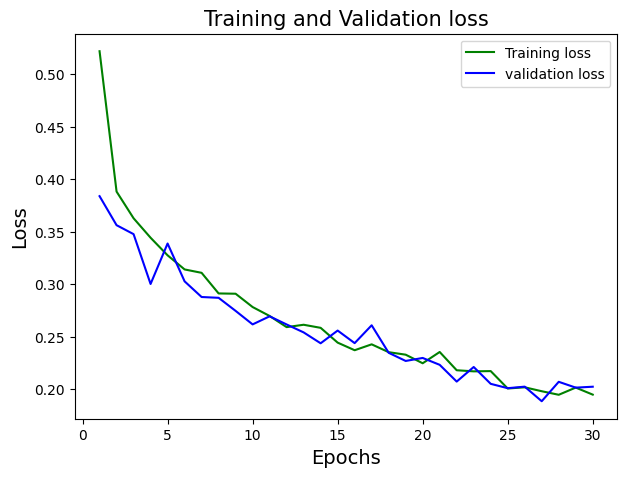

In [ ]:
train_and_val_loss()

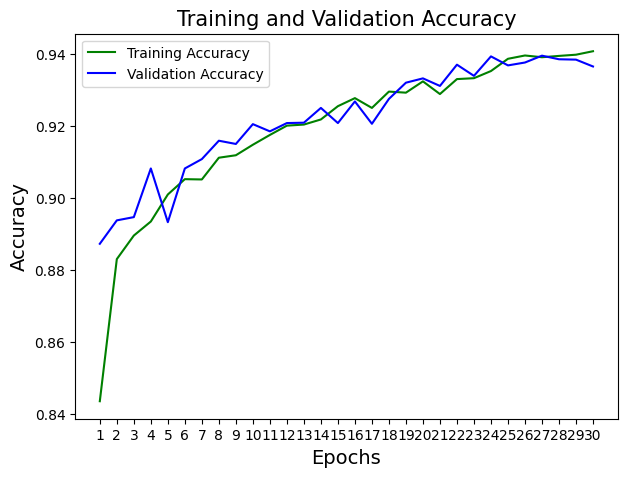

In [ ]:
train_and_val_acc()

In [ ]:
predictions_matrix = model.predict(X_test)
predictions = np.argmax(predictions_matrix, axis=1)  # Prueba a comentar esta línea y discutamos qué pasa
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Test Accuracy: {accuracy_score(y_pred=predictions,y_true=y_test_original)}")
print(f"Test Recall: {recall_score(y_pred=predictions,y_true=y_test_original,average='macro')}")
print(f"Test Precision: {precision_score(y_pred=predictions,y_true=y_test_original,average='macro')}")

313/313 [==============================] - 1s 2ms/step
Test Accuracy: 0.9365
Test Recall: 0.9360311643247193
Test Precision: 0.936099566311411


#### Respuesta 3

In [ ]:
# 3 capa oculta de 100, 200, 100 neuronas con activación  relu . Entrena durante 15 épocas.
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28,28))) # Tenemos que aplanar las matrices representando a cada imagen, las capas densas sólo funcionan con vectores de entrada
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Cuando se trata de tareas de clasificación multiclase, ponemos una activación softmax en la capa de salida

In [ ]:
model.compile(loss='categorical_crossentropy',
	      optimizer='adam',
	      metrics=['acc']
		  )

In [ ]:
n_epocas = 30
history = model.fit(X_train, y_train, epochs=n_epocas, validation_data=(X_test,y_test))

Epoch 1/30
1875/1875 [==============================] - 12s 4ms/step - loss: 0.8391 - acc: 0.8656 - val_loss: 0.2905 - val_acc: 0.9209
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2256 - acc: 0.9383 - val_loss: 0.1960 - val_acc: 0.9465
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1677 - acc: 0.9526 - val_loss: 0.1859 - val_acc: 0.9485
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1398 - acc: 0.9605 - val_loss: 0.1752 - val_acc: 0.9514
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1267 - acc: 0.9645 - val_loss: 0.1263 - val_acc: 0.9660
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1063 - acc: 0.9700 - val_loss: 0.1502 - val_acc: 0.9601
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0965 - acc: 0.9737 - val_loss: 0.1420 - val_acc: 0.9635
Epoch 8/30
1875/1875 [==============================] - 7s 3m

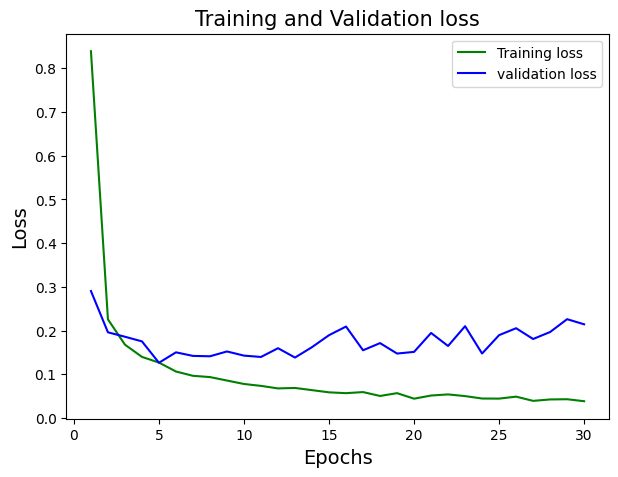

In [ ]:
train_and_val_loss()

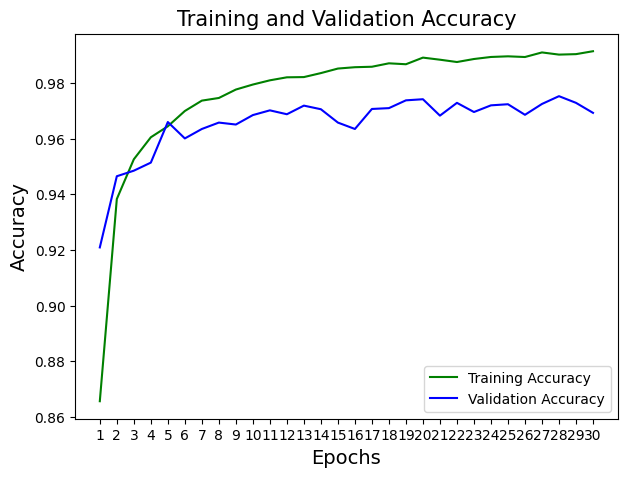

In [ ]:
train_and_val_acc()

In [ ]:
predictions_matrix = model.predict(X_test)
predictions = np.argmax(predictions_matrix, axis=1)  # Prueba a comentar esta línea y discutamos qué pasa
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Test Accuracy: {accuracy_score(y_pred=predictions,y_true=y_test_original)}")
print(f"Test Recall: {recall_score(y_pred=predictions,y_true=y_test_original,average='macro')}")
print(f"Test Precision: {precision_score(y_pred=predictions,y_true=y_test_original,average='macro')}")

313/313 [==============================] - 1s 2ms/step
Test Accuracy: 0.9693
Test Recall: 0.9693199862410564
Test Precision: 0.9692308025439751


#### Respuesta 4

##### Modelo 1

In [ ]:
# 3 capa oculta de 100, 200, 100 neuronas con activación  relu . Entrena durante 15 épocas.
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28,28))) # Tenemos que aplanar las matrices representando a cada imagen, las capas densas sólo funcionan con vectores de entrada
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Cuando se trata de tareas de clasificación multiclase, ponemos una activación softmax en la capa de salida

In [ ]:
model.compile(loss='categorical_crossentropy',
	      optimizer='Adam',
	      metrics=['acc']
		  )

In [ ]:
n_epocas = 30
history = model.fit(X_train, y_train, epochs=n_epocas, validation_data=(X_test,y_test))

Epoch 1/30
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5887 - acc: 0.8759 - val_loss: 0.2405 - val_acc: 0.9307
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2145 - acc: 0.9404 - val_loss: 0.2088 - val_acc: 0.9408
Epoch 3/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1667 - acc: 0.9539 - val_loss: 0.1549 - val_acc: 0.9579
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1347 - acc: 0.9628 - val_loss: 0.1557 - val_acc: 0.9598
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1148 - acc: 0.9677 - val_loss: 0.1470 - val_acc: 0.9628
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0999 - acc: 0.9715 - val_loss: 0.1393 - val_acc: 0.9669
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0892 - acc: 0.9751 - val_loss: 0.1113 - val_acc: 0.9720
Epoch 8/30
1875/1875 [==============================] - 8s 4

In [ ]:
predictions_matrix = model.predict(X_test)
predictions = np.argmax(predictions_matrix, axis=1)  # Prueba a comentar esta línea y discutamos qué pasa
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Test Accuracy: {accuracy_score(y_pred=predictions,y_true=y_test_original)}")
print(f"Test Recall: {recall_score(y_pred=predictions,y_true=y_test_original,average='macro')}")
print(f"Test Precision: {precision_score(y_pred=predictions,y_true=y_test_original,average='macro')}")

313/313 [==============================] - 1s 2ms/step
Test Accuracy: 0.9768
Test Recall: 0.9766631947002585
Test Precision: 0.9766316706136999


##### Modelo 2

In [ ]:
# 3 capa oculta de 100, 200, 100 neuronas con activación  tanh . Entrena durante 15 épocas.
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28,28))) # Tenemos que aplanar las matrices representando a cada imagen, las capas densas sólo funcionan con vectores de entrada
model.add(Dense(100, activation='tanh'))
model.add(Dense(200, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(10, activation='softmax'))  # Cuando se trata de tareas de clasificación multiclase, ponemos una activación softmax en la capa de salida

In [ ]:
model.compile(loss='categorical_crossentropy',
	      optimizer='Adam',
	      metrics=['acc']
		  )

In [ ]:
n_epocas = 30
history = model.fit(X_train, y_train, epochs=n_epocas, validation_data=(X_test,y_test))

Epoch 1/30
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5701 - acc: 0.8155 - val_loss: 0.4634 - val_acc: 0.8505
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4239 - acc: 0.8640 - val_loss: 0.3657 - val_acc: 0.8875
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3706 - acc: 0.8805 - val_loss: 0.3249 - val_acc: 0.8996
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3364 - acc: 0.8928 - val_loss: 0.3156 - val_acc: 0.8985
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3165 - acc: 0.8980 - val_loss: 0.3310 - val_acc: 0.8910
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3269 - acc: 0.8952 - val_loss: 0.3113 - val_acc: 0.9069
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3146 - acc: 0.8992 - val_loss: 0.2842 - val_acc: 0.9084
Epoch 8/30
1875/1875 [==============================] - 13s 7m

In [ ]:
predictions_matrix = model.predict(X_test)
predictions = np.argmax(predictions_matrix, axis=1)  # Prueba a comentar esta línea y discutamos qué pasa
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Test Accuracy: {accuracy_score(y_pred=predictions,y_true=y_test_original)}")
print(f"Test Recall: {recall_score(y_pred=predictions,y_true=y_test_original,average='macro')}")
print(f"Test Precision: {precision_score(y_pred=predictions,y_true=y_test_original,average='macro')}")

313/313 [==============================] - 1s 2ms/step
Test Accuracy: 0.9285
Test Recall: 0.9274560231176399
Test Precision: 0.9280938725754849


##### Modelo 3

In [ ]:
# 3 capa oculta de 100, 200, 100 neuronas con activación  tanh . Entrena durante 15 épocas y optimizor = RMSprop.
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28,28))) # Tenemos que aplanar las matrices representando a cada imagen, las capas densas sólo funcionan con vectores de entrada
model.add(Dense(100, activation='tanh'))
model.add(Dense(200, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(10, activation='softmax'))  # Cuando se trata de tareas de clasificación multiclase, ponemos una activación softmax en la capa de salida

In [ ]:
model.compile(loss='categorical_crossentropy',
	      optimizer='RMSprop',
	      metrics=['acc']
		  )

In [ ]:
n_epocas = 30
history = model.fit(X_train, y_train, epochs=n_epocas, validation_data=(X_test,y_test))

Epoch 1/30
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4259 - acc: 0.8680 - val_loss: 0.2902 - val_acc: 0.9103
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2687 - acc: 0.9178 - val_loss: 0.2375 - val_acc: 0.9265
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2320 - acc: 0.9293 - val_loss: 0.2139 - val_acc: 0.9344
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2116 - acc: 0.9346 - val_loss: 0.2016 - val_acc: 0.9413
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2012 - acc: 0.9400 - val_loss: 0.1951 - val_acc: 0.9403
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1894 - acc: 0.9422 - val_loss: 0.1980 - val_acc: 0.9405
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1792 - acc: 0.9448 - val_loss: 0.1786 - val_acc: 0.9474
Epoch 8/30
1875/1875 [==============================] - 7s 4ms

In [ ]:
predictions_matrix = model.predict(X_test)
predictions = np.argmax(predictions_matrix, axis=1)  # Prueba a comentar esta línea y discutamos qué pasa
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Test Accuracy: {accuracy_score(y_pred=predictions,y_true=y_test_original)}")
print(f"Test Recall: {recall_score(y_pred=predictions,y_true=y_test_original,average='macro')}")
print(f"Test Precision: {precision_score(y_pred=predictions,y_true=y_test_original,average='macro')}")

313/313 [==============================] - 1s 2ms/step
Test Accuracy: 0.9524
Test Recall: 0.9521316852880671
Test Precision: 0.9521891862331262


# ⭕ Parte II

Tomando como referencia la [notebook](https://github.com/DCDPUAEM/DCDP/blob/main/04%20Deep%20Learning/notebooks/02-MLP-Regresion.ipynb) de MLP para regresión, realiza las siguientes tareas. En las primeras 5 tareas el objetivo es experimentar y reflexionar sobre el efecto de distintos aspectos del entrenamiento en el rendimiento del modelo.

1. Repite el entrenamiendo del modelo usando 100 épocas **sin normalizar los datos**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento?

2. Repite el entrenamiendo del modelo usando 100 épocas, normalización de los datos y **con alguna función de activación en la capa de salida (tanh o sigmoide)**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento?

4. Repite el entrenamiendo del modelo usando 100 épocas, normalización de los datos y **con la función de activación ReLU en la capa de salida**, ¿qué le sucede a las métricas de rendimiento y curvas de entrenamiento?

5. Comprueba el modelo que entrenamos en la notebook (con 100 épocas, normalización y sin función de activación en la salida) con los siguientes algoritmos de ML clásico:
 * Regresión Lineal
 * Regresión Polinomial
 * Regresor KNN
 Comprueba los modelos usando MAE en el conjunto de prueba. ¿Cuál tuvo mejor desempeño?  

El objetivo en la siguiente tarea es experimentar para encontrar un mejor modelo que suba las métricas de rendimiento del modelo. **Cuidado con el overfitting.**

5. Usando los datos normalizados, prueba con diferentes combinaciones de los parámetros del módelo:
    * Número de capas ocultas
    * Número de nueronas en las capas ocultas
    * Funciones de activación de las capas ocultas
    * Optimizador y tasa de entrenamiento

 Puedes hacer el modelo más sencillo o más complejo. Reporta la combinación de parámetros que produjo el mejor resultado.

En esta última tarea probaras cómo es recibir nuevos datos para realizar predicciones con tu mejor modelo que hayas obtenido.

6. Ya que tengas tu mejor modelo, toma el archivo `mpg_new_data.csv` del repositorio y obten las predicciones para estos datos. Compararemos contra los valores reales. **Guarda estas predicciones en un archivo CSV, que también adjuntarás en la entrega de la actividad**.

## El conjunto de datos

Cargamos, limpiamos y separamos los datos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/04%20Deep%20Learning/data/auto-mpg.data"

df = pd.read_csv(url,
                header=0,
                index_col=0,
                na_values = "?",
                comment='\t',
                skipinitialspace=True)

df = df.dropna()
df = pd.get_dummies(data=df,columns=['Origin'],
                       drop_first=True,dtype=int)
df.rename(columns={'Origin_2':'Europe',
                   'Origin_3':'Japan'},
             inplace=True)
display(df)

X = df.iloc[:,1:].values
y = df['MPG'].values

print(f"Shapes de X y y: {X.shape}, {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.85,random_state=189)

print(f"Train size: {X_train.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0
...,...,...,...,...,...,...,...,...,...
391,36.0,4,135.0,84.0,2370.0,13.0,82,0,0
392,27.0,4,151.0,90.0,2950.0,17.3,82,0,0
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0


Shapes de X y y: (390, 8), (390,)
Train size: 331
Test size: 59


## Tu trabajo

#### Respuesta 1

In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

In [ ]:
def build_model(activation=None):
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation=activation)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

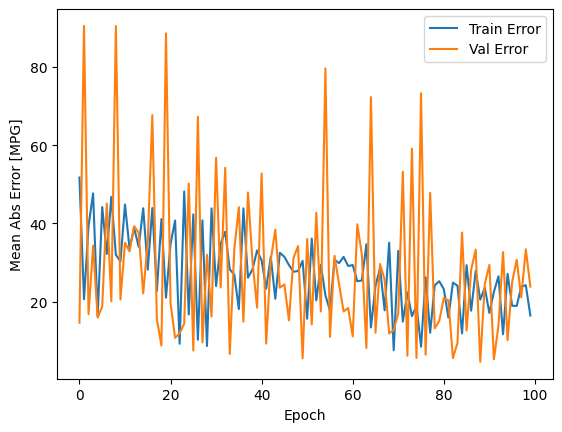

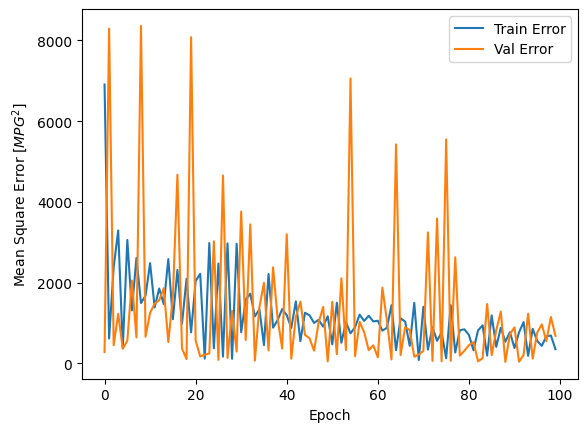

In [ ]:
model_me = build_model()
EPOCHS = 100

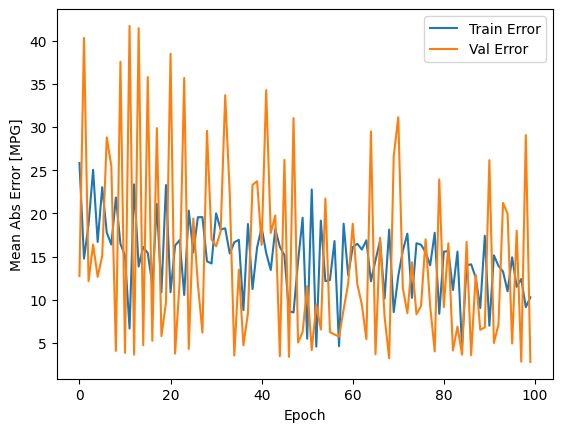

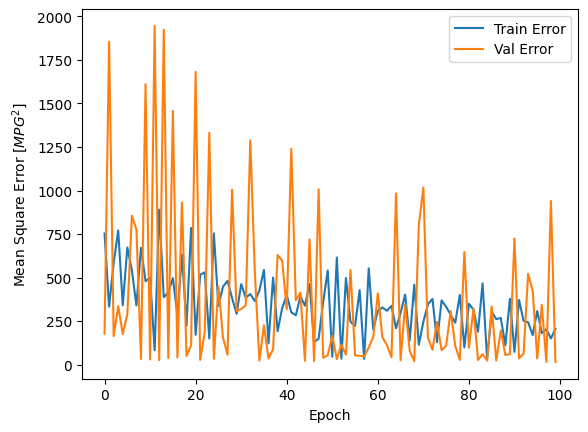

In [ ]:
history = model_me.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0)
plot_history(history)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,308.413879,14.926370,308.413879,35.183987,4.942566,35.183987,95
96,180.888687,11.506366,180.888687,343.351349,18.000881,343.351349,96
97,203.535324,12.416014,203.535324,15.944538,2.842681,15.944538,97
98,150.344711,9.150843,150.344711,940.114624,29.068321,940.114624,98
99,205.890930,10.292519,205.890930,15.650074,2.814795,15.650072,99


Los graficos muestran la irregularidad de los valores de mse and mae (picos y valles)

#### Respuesta 2

In [ ]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

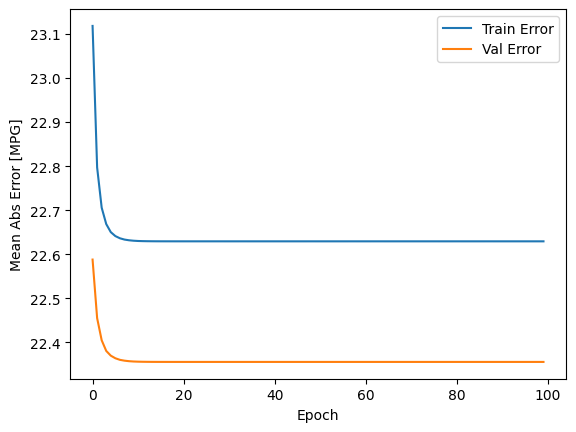

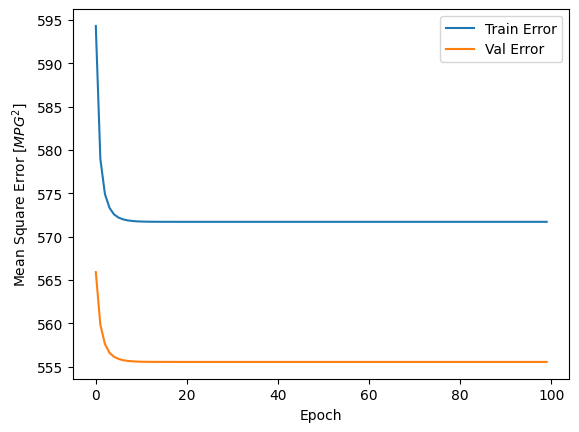

In [ ]:
model_me = build_model(activation='tanh')
EPOCHS = 100

history = model_me.fit(X_train_scl, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0)
plot_history(history)

En la grafica se observan valores constantes para train error y val error tanto para mse como para mae despues de la epoca 5 aproximadamente

#### Respuesta 3

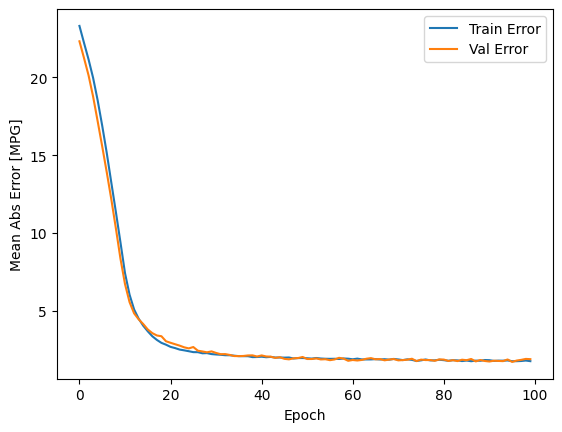

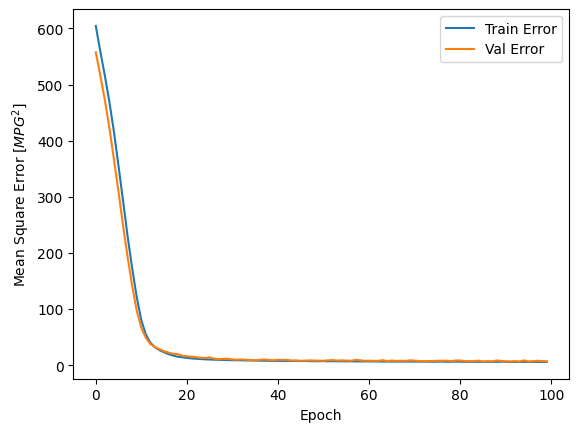

In [ ]:
model_me = build_model(activation='relu')
EPOCHS = 100

history = model_me.fit(X_train_scl, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0)
plot_history(history)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,5.782109,1.746569,5.782109,6.684226,1.699400,6.684226,95
96,5.763256,1.747391,5.763256,7.020523,1.787828,7.020523,96
97,5.748153,1.759333,5.748153,7.825828,1.832292,7.825828,97
98,5.767145,1.788276,5.767145,7.085779,1.892712,7.085779,98
99,5.789793,1.748907,5.789793,6.986235,1.876952,6.986235,99


Los valores de Train Error / Val Error son muy similares tanto para mse como para mae. A partir de la epoca 20 aproximadamente no cambian mucho mas

#### Respuesta 4

##### Lineal Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

lr = LinearRegression()
lr.fit(X_train_scl, y_train)

LinearRegression()

In [ ]:
lr.score(X_test,y_test)
y_pred_test = lr.predict(X_test_scl)

y_pred_train = lr.predict(X_train_scl)

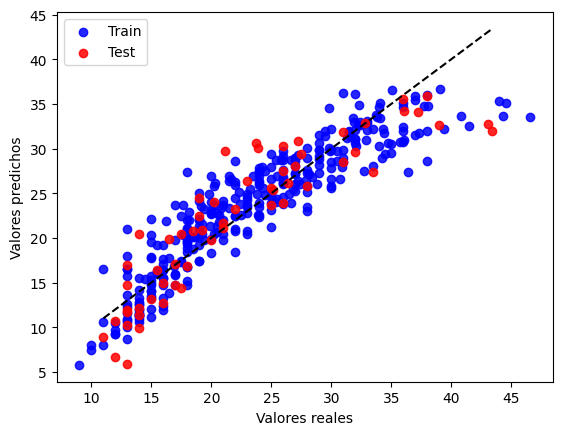

In [ ]:
xaxis = np.linspace(np.min(y_test),np.max(y_test),100)
plt.figure(dpi=100)
plt.scatter(y_train, y_pred_train, c='blue',alpha=0.85,label='Train')
plt.scatter(y_test, y_pred_test, c='red',alpha=0.85,label='Test')
plt.plot(xaxis,xaxis,'k--')  # La línea de referencia y_pred=y_real
plt.legend(loc='best')
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.show()

In [ ]:
print(f"MAE en el conjunto de prueba: {mean_absolute_error(y_test,y_pred_test)}")  # Esta es muy interpretativa
print(f"MSE en el conjunto de prueba: {mean_squared_error(y_test,y_pred_test)}")

MAE en el conjunto de prueba: 2.924186600165398
MSE en el conjunto de prueba: 14.770330614857341


##### Polinomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

pfeats = PolynomialFeatures(degree=2, include_bias=False)
# pfeats = PolynomialFeatures(degree=2, include_bias=True)
new_x_train = pfeats.fit_transform(X_train_scl)

In [ ]:
lr = LinearRegression()
lr.fit(new_x_train,y_train)

LinearRegression()

In [ ]:
X_test_scl = pfeats.transform(X_test_scl)
lr.score(X_test_scl,y_test)

y_pred_test = lr.predict(X_test_scl)
print(f"MAE en el conjunto de prueba: {mean_absolute_error(y_test,y_pred_test)}")
print(f"MSE en el conjunto de prueba: {mean_squared_error(y_test,y_pred_test)}")

MAE en el conjunto de prueba: 2.062231652211335
MSE en el conjunto de prueba: 8.17285801036252


El modelo con regresion polinomial tiene valores muy cercanos al mejor modelo con redes neuronales

#### Respuesta 5

##### Modelo 1

In [ ]:
# una capa mas que el modelo original
model = keras.Sequential([
layers.Dense(64, activation='relu', input_shape=[X_train_scl.shape[1]]),
layers.Dense(64, activation='relu'),
layers.Dense(64, activation='relu'),
layers.Dense(1, activation=None)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])


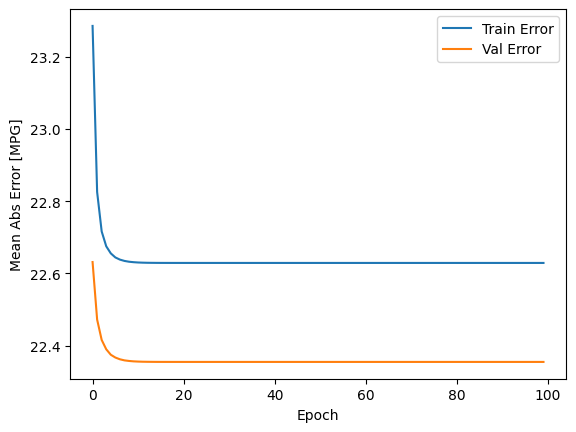

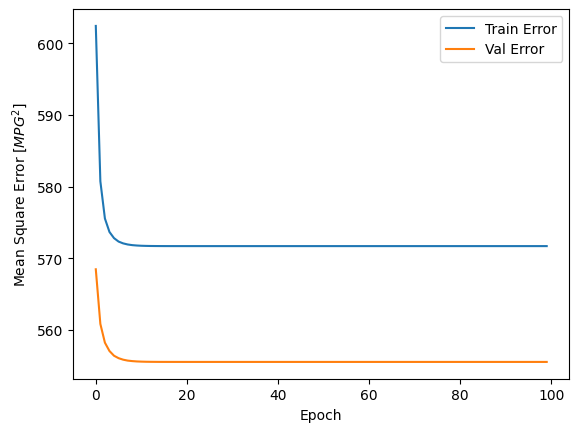

In [ ]:
model_me = build_model(activation='tanh')
EPOCHS = 100

history = model_me.fit(X_train_scl, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0)
plot_history(history)

##### Modelo 2

In [ ]:
# tasa de aprendizaje de 0.01 y una capa mas que el modelo original
model = keras.Sequential([
layers.Dense(64, activation='tanh', input_shape=[X_train_scl.shape[1]]),
layers.Dense(64, activation='tanh'),
layers.Dense(64, activation='tanh'),
layers.Dense(1, activation=None)
])

optimizer = tf.keras.optimizers.RMSprop(0.01)

model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])

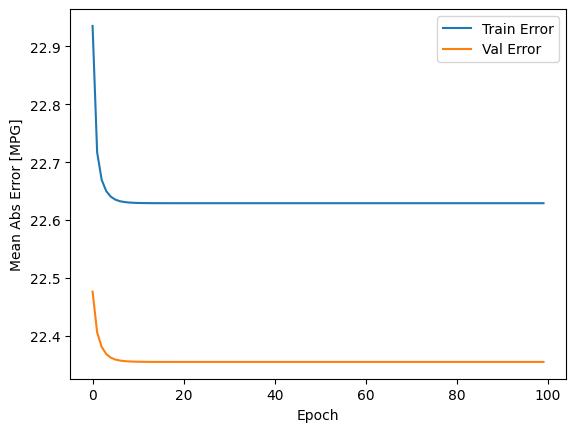

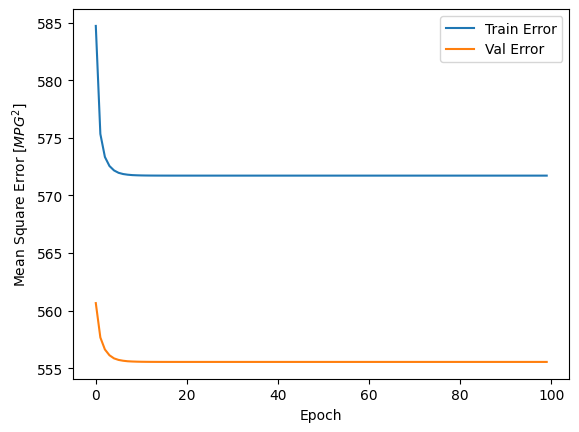

In [ ]:
model_me = build_model(activation='tanh')
EPOCHS = 100

history = model_me.fit(X_train_scl, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0)
plot_history(history)

##### Modelo 3

In [ ]:
# tasa de aprendizaje de 0.01 y optimizer = Adam
model = keras.Sequential([
layers.Dense(64, activation='relu', input_shape=[X_train_scl.shape[1]]),
layers.Dense(64, activation='relu'),
layers.Dense(64, activation='relu'),
layers.Dense(1, activation=None)
])

optimizer = tf.keras.optimizers.Adam(0.01)

model.compile(loss='mse',
            optimizer=optimizer,
            metrics=['mae', 'mse'])

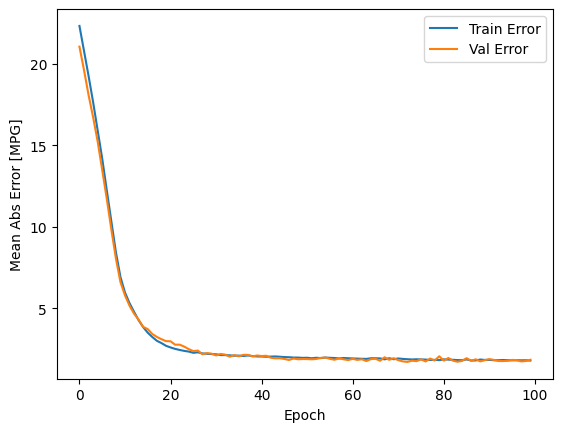

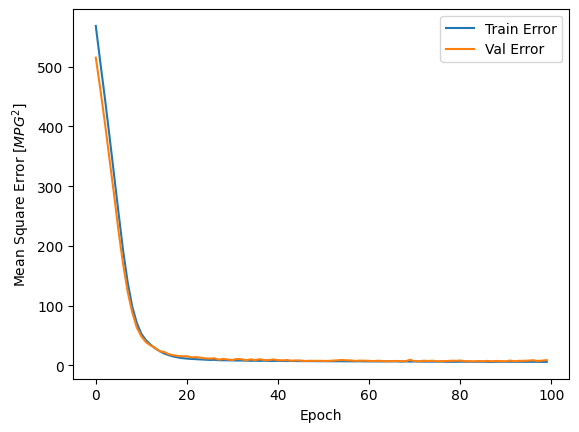

In [ ]:
model_me = build_model(activation='relu')
EPOCHS = 100

history = model_me.fit(X_train_scl, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0)
plot_history(history)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,5.900701,1.795915,5.900701,7.943615,1.820130,7.943615,95
96,5.948543,1.800974,5.948543,8.636167,1.806416,8.636167,96
97,5.870618,1.795204,5.870618,7.204322,1.729566,7.204322,97
98,5.786292,1.798852,5.786292,8.001121,1.754660,8.001121,98
99,5.767688,1.780118,5.767688,8.777535,1.829479,8.777535,99


#### Respuesta 6